In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stanford-earthquake-dataset-stead/merge.hdf5
/kaggle/input/stanford-earthquake-dataset-stead/merge.csv


# Proyecto Final Capstone: Análisis de terremotos
##### Grupo: B05

**RESUMEN**
El proyecto presente explora la aplicación de métodos de minería de datos para la detección de terremotos empleando la base de datos STanford EArthquake Dataset (STEAD).  Se tomará Python como herramienta durante todo el estudio. El proyecto se lleva a cabo con el método KDD.  

**INTRODUCCIÓN**

La actual disponibilidad de grandes volúmenes de datos sísmicos y los avances en técnicas de Machine Learning brindan oportunidades para mejorar nuestra comprensión y capacidad de respuesta frente a los eventos sísmicos. La base de datos que se empleará es la STEAD, que contiene un conjunto de datos sísmicos meticulosamente curado y se considera un recurso fundamental para los investigadores del campo de la ciencia de datos aplicada a la sismología. Este proyecto Capstone se propone explorar y aplicar técnicas avanzadas de minería de datos en Python para analizar STEAD.

Se utilizará Python, un lenguaje de programación líder en ciencia de datos por su sintaxis clara y legible y sus librerías de análisis y aprendizaje automático como Pandas, NumPy, Scikit-learn, y TensorFlow.  Este estudio aborda el desafío de procesar y analizar grandes volúmenes de datos de señales sísmicas. Se probarán distintas técnicas, como la regresión múltiple o GSP, para descubrir patrones y correlaciones significativas en los datos que puedan ofrecer perspectivas nuevas sobre los factores más influyentes en la magnitud de los terremotos.

Este documento se organiza de la siguiente manera: inicialmente, se realiza un preprocesamiento de los datos centrado en los metadatos.  Más adelante se emplean algunas técnicas vistas durante el cuatrimestre para obtener la máxima precisión de detección de terremotos.

**OBJETIVOS**

El objetivo general del proyecto es desarrollar y validar un modelo predictivo de minería de datos empleando el dataset STEAD para mejorar la detección de eventos sísmicos, ya sean terremotos o ruido, buscando la mayor precisión posible.

En cuanto a los objetivos específicos, se tienen en cuenta los siguientes:
* Explorar los datos y prepararlos mediante preprocesamiento.
* Desarrollar modelos de Data Mining.
* Evaluar la eficacia de los modelos realizados y validarlos.
* Comprender cómo trabajar con bases de datos extensas y que contienen señales.


**APLICACIONES DEL PROYECTO**

* Predecir magnitud/ características de un terremoto puede ser útil para mejorar las alertas rápidas y así minimizar daños.
* Toma de decisiones sobre urbanismo y su planificación en zonas sísmicas.  Ayuda a arquitectos con la toma de decisiones.
* Mejorar y estudiar a fondo los modelos de riesgo sísmico.

**DESCRIPCIÓN DE LA BASE DE DATOS STEAD**

La base de datos STEAD (STanford EArthquake Dataset) es un conjunto de datos de señales sísmicas diseñado para el análisis y desarrollo de algoritmos de Machine Learning y Data Mining.  La aplicación de estos algoritmos se realiza para la detección y/o clasificación de eventos sísmicos o terremotos.  

STEAD es un conjunto muy extenso (91 GB) de más de un millón de muestras etiquetadas.  No solo se contemplan señales de terremotos, sino también ruidos de fondo sísmico.  Cada muestra de la base de datos está etiquetada como terremoto o ruido.

En cuanto a la estructura de datos: las muestras son señales unidimensionales con frecuencia de muestreo 100 Hz, en su mayoría recortadas a trozos de 60 segundos de duración, lo cual aporta uniformidad, característica ideal para métodos de minería de datos.  Además, a cada muestra le acompañan metadatos que incluyen: profundidad del hipocentro, magnitud, tiempo de origen, distancia entre epicentro y el sensor, coordenadas del epicentro y Signal to Noise Ratio (calidad de la señal sísmica).

**STEAD EN LA INVESTIGACIÓN Y DESARROLLO**

El dataset descrito es consistente y completo, lo que lo hace ideal para desarrolar modelos de predicción de terremotos.  Se pueden emplear técnicas para extraer las características de dominio temporal y frecuencial para analizar las características más informativas.  Además, es importante que se lleve a cabo la ingeniería de características para obtener los mejores resultados posibles.  

**CONSIDERACIONES**

Los terremotos y el ruido ocurren con frecuencia muy distinta, por lo que sería interesante aplicar técnicas de balanceo de clases o ajustar la función de pérdida para equilibrar la desproporción de las clases.  Aunque STEAD es una base de datos muy consistente y bien valorada, crear un modelo que generalice datos no vistos sigue siendo un desafío en el ámbito sismológico, pues se tienen en cuenta demasiados factores: ya solo de ubicación hay un amplio abanico de opciones.

**VARIABLES PRESENTES EN EL DATASET**

*Variables Generales*
- network_code: Identificador de la red sísmica que proporcionó los datos. Esta variable es crucial para clasificar y organizar los seismogramas según la red de monitoreo a la que pertenecen. Esta variable es necesaria ya que el dataset es realmente una recopilación de diversas fuentes.
- receiver_code: Código único asignado a cada seismómetro que registra los datos. 
- receiver_type: Descripción del tipo de seismómetro utilizado para grabar los datos.

*Variables de Ubicación*
- receiver_latitude: Latitud geográfica del seismómetro al momento de registrar los datos. Esta variable es fundamental para localizar la posición exacta de donde se capturaron los datos sísmicos.
- receiver_longitude: Longitud geográfica del seismómetro. Junto con la latitud, ayuda a proporcionar una localización precisa de la estación de monitoreo.
- receiver_elevation_m: Altura del seismómetro respecto al nivel del mar, expresada en metros. La elevación puede influir en la forma en que se registran las señales sísmicas debido a la variación en las propiedades geológicas y atmosféricas con la altitud.

*Variables Temporales*
- trace_start_time: Fecha y hora exactas en que comenzó el registro del seismograma. Esta marca temporal es crucial para correlacionar los registros con eventos específicos y para análisis que requieren precisión temporal.

*Variables de la Categoría de la señal*
- trace_category: Clasificación de la señal como 'earthquake_local' (evento sísmico local) o 'noise' (ruido). Esta categorización es esencial para filtrar y analizar los datos según el tipo de señal registrada.
- trace_name: Identificador único para cada señal de seismograma registrado. Facilita la gestión, referencia y análisis de datos específicos dentro del dataset.

*Variables de Llegada de Fases*
- p_arrival_sample: Índice de la muestra dentro del seismograma donde se detecta la llegada de la onda P. Es fundamental para estudios de tiempos de llegada y velocidad de las ondas sísmicas.
- s_arrival_sample: Índice de la muestra donde se detecta la llegada de la onda S. Al igual que la onda P, es clave para determinar la estructura interna de la Tierra y la localización del epicentro.
- p_status: Estado de la detección de la onda P, indicando si fue identificada manualmente o por un sistema automático (autopicker).
- s_status: Similar a p_status, pero aplicado a la detección de la onda S.

*Variables de Peso y Tiempo de Viaje*
- p_weight: Ponderación de la fiabilidad de la detección de la onda P. Indica la calidad o certeza de la detección en el análisis.
- s_weight: Ponderación de la fiabilidad de la detección de la onda S.
- p_travel_sec: Tiempo que tarda la onda P en viajar desde el epicentro hasta el receptor. Este dato es vital para cálculos de distancia y profundidad del hipocentro.

*Variables de Fuente Sísmica*
- source_id: Identificador único de la fuente sísmica que recogió las ondas registradas en el seismograma.
- source_origin_time: Tiempo exacto en que ocurrió el evento sísmico que recogió las ondas registradas.
- source_latitude y source_longitude: Coordenadas geográficas del epicentro del evento sísmico.
- source_depth_km: Profundidad del evento sísmico bajo la superficie terrestre, medida en kilómetros.
- source_magnitude: Magnitud del sismo, indicando la cantidad de energía liberada durante el evento.
- source_magnitude_type: Tipo de magnitud registrada, que puede variar según la escala usada (por ejemplo, magnitud local, magnitud de momento, etc.).
- back_azimuth_deg: Dirección desde la estación de registro hasta el epicentro del sismo, medida en grados respecto al norte geográfico.
- snr_db: Relación señal-ruido de la grabación, medida en decibelios, que ayuda a evaluar la calidad de los datos registrados.
- coda_end_sample: Índice de muestra en el seismograma donde termina la energía dominante de la señal.


Para trabajar con el dataset, utilizamos los servicios de kaggle que nos permiten guardar el input de manera persistente, lo cual es conveniente al ser un dataset de ~90GB.

In [2]:
import os
import pandas as pd

input_dir = '/kaggle/input/stanford-earthquake-dataset-stead/'
filename = 'merge.csv'
df_original = pd.read_csv(os.path.join(input_dir, filename), low_memory=False)
df_original.head()

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,trace_name
0,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-21 05:55:00,noise,109C.TA_201510210555_NO
1,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06 14:50:00,noise,109C.TA_201511061450_NO
2,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-07 02:20:00,noise,109C.TA_201511070220_NO
3,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-14 05:15:00,noise,109C.TA_201511140515_NO
4,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-25 18:50:00,noise,109C.TA_201512251850_NO


Realizamos una copia del dataset, para ejecutar desde este punto las celdas, y no tener que volver a leer el dataset a pandas

In [3]:
df = df_original.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265657 entries, 0 to 1265656
Data columns (total 35 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   network_code                      1265613 non-null  object 
 1   receiver_code                     1265657 non-null  object 
 2   receiver_type                     1265657 non-null  object 
 3   receiver_latitude                 1265657 non-null  float64
 4   receiver_longitude                1265657 non-null  float64
 5   receiver_elevation_m              1265657 non-null  float64
 6   p_arrival_sample                  1030231 non-null  float64
 7   p_status                          1030231 non-null  object 
 8   p_weight                          1030057 non-null  float64
 9   p_travel_sec                      1030231 non-null  float64
 10  s_arrival_sample                  1030231 non-null  float64
 11  s_status                          103

Se trata de un dataset con 1265657 filas y 35 columnas.

La variable trace_name es un identificador único para cada observación:

In [4]:
len(df['trace_name'].unique()) == len(df)

True

Por tanto, lo podemos utilizar como índice de fila.

In [5]:
df = df.set_index('trace_name')
df.head()

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_type,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category
trace_name,,,,,,,,,,,,,,,,,,,,,
109C.TA_201510210555_NO,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-21 05:55:00,noise
109C.TA_201511061450_NO,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06 14:50:00,noise
109C.TA_201511070220_NO,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-07 02:20:00,noise
109C.TA_201511140515_NO,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-14 05:15:00,noise
109C.TA_201512251850_NO,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-25 18:50:00,noise


network_code, receiver_code, trace_start_time y trace_category se especifican en el trace_name  

trace_name = [receiver_code].[network_code]\_[trace_start_time]\_[trace_category]

Observaciones:
- trace_start_time se expresa como unión sin espacios de las unidades de tiempo
- trace_category toma valores NO y EV para categorías noise y earthquake_local respectivamente

Se convierten a formato fecha las variables source_origin_time y trace_start_time

In [6]:
df['trace_start_time'] = pd.to_datetime(df['trace_start_time'], format='ISO8601')# format="%Y-%m-%d %H:%M:%S")
df['source_origin_time'] = pd.to_datetime(df['source_origin_time'], format='ISO8601')

In [7]:
df.iloc[0]['trace_start_time']

Timestamp('2015-10-21 05:55:00')

Se han recogido dos tipos de señales:  
- noise: sonidos no debidos a terremotos
- earthquake_local: terremotos que se encuentran en un radio menor a 350km

In [8]:
df.loc[:, 'trace_category'].unique()

array(['noise', 'earthquake_local'], dtype=object)

Para estudios que vamos a realizar, vamos dividir en dataframes uno por cada tipo de señal:

### Señales noise

Obtenemos un subdataset cuyas observaciones son señales noise, y podemos ver el ratio y el tamaño del subconjunto

In [9]:
df_noise = df.loc[df.loc[:, 'trace_category'] == 'noise']
size = len(df_noise)
print(f'len(df_noise)={size}, ratio={size/len(df)*100:.2f}%')
df_noise.head()

len(df_noise)=235426, ratio=18.60%


,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_type,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category
trace_name,,,,,,,,,,,,,,,,,,,,,
109C.TA_201510210555_NO,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-21 05:55:00,noise
109C.TA_201511061450_NO,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06 14:50:00,noise
109C.TA_201511070220_NO,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-07 02:20:00,noise
109C.TA_201511140515_NO,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-14 05:15:00,noise
109C.TA_201512251850_NO,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-25 18:50:00,noise


En la documentación del dataset se muestra que las señales categorizadas como noise, solo cuentan con 8 variables y el resto toman valores NA, eliminamos las variables que tienen todos sus valores NA:

In [10]:
df_noise = df_noise.dropna(axis=1, how='all')
print(df_noise.shape)
df_noise.head()

(235426, 8)


,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,trace_start_time,trace_category
trace_name,,,,,,,,
109C.TA_201510210555_NO,TA,109C,HH,32.8889,-117.1051,150.0,2015-10-21 05:55:00,noise
109C.TA_201511061450_NO,TA,109C,HH,32.8889,-117.1051,150.0,2015-11-06 14:50:00,noise
109C.TA_201511070220_NO,TA,109C,HH,32.8889,-117.1051,150.0,2015-11-07 02:20:00,noise
109C.TA_201511140515_NO,TA,109C,HH,32.8889,-117.1051,150.0,2015-11-14 05:15:00,noise
109C.TA_201512251850_NO,TA,109C,HH,32.8889,-117.1051,150.0,2015-12-25 18:50:00,noise


Una vez hecho esto, podemos comprobar si existen más valores NA, debidos a incosistencias.

In [11]:
print(f'Número total de NA en el dataframe: {(col_na:=df_noise.isna().sum()).sum()}')
df_noise_na = pd.DataFrame({'Valores NA': col_na})
df_noise_na

Número total de NA en el dataframe: 0


,Valores NA
network_code,0
receiver_code,0
receiver_type,0
receiver_latitude,0
receiver_longitude,0
receiver_elevation_m,0
trace_start_time,0
trace_category,0


Realizamos comprobaciones similares para los datos de terremotos.

### Señales noise

In [12]:
df_earthquakes = df.loc[df.loc[:, 'trace_category'] == 'earthquake_local']
size = len(df_earthquakes)
print(f'len(df_earthquakes)={size}, ratio={size/len(df)*100:.2f}%')
df_earthquakes.head()

len(df_earthquakes)=1030231, ratio=81.40%


,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_type,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category
trace_name,,,,,,,,,,,,,,,,,,,,,
109C.TA_20060723155859_EV,TA,109C,BH,32.8889,-117.1051,150.0,700.0,manual,0.5,17.080000,...,ml,NaN,NaN,0.92,102.09,159.3,[56.79999924 55.40000153 47.40000153],[[2896.]],2006-07-23 15:59:00.960,earthquake_local
109C.TA_20061103155652_EV,TA,109C,BH,32.8889,-117.1051,150.0,600.0,manual,0.5,16.879999,...,mb,NaN,NaN,0.91,101.34,281.7,[65. 65.5 61.40000153],[[5508.]],2006-11-03 15:56:53.610,earthquake_local
109C.TA_20061103161223_EV,TA,109C,BH,32.8889,-117.1051,150.0,500.0,manual,0.5,17.260000,...,ml,NaN,NaN,0.92,101.87,280.5,[37.20000076 42. 38.59999847],[[3114.]],2006-11-03 16:12:24.700,earthquake_local
109C.TA_20061114133221_EV,TA,109C,BH,32.8889,-117.1051,150.0,900.0,manual,0.5,17.280001,...,ml,NaN,NaN,0.93,103.26,281.6,[54.09999847 54.90000153 45.5 ],[[3152.]],2006-11-14 13:32:22.540,earthquake_local
109C.TA_20061127104640_EV,TA,109C,BH,32.8889,-117.1051,150.0,700.0,manual,0.5,18.139999,...,ml,NaN,NaN,0.92,102.48,4.7,[58.20000076 56.20000076 53.79999924],[[3134.]],2006-11-27 10:46:41.060,earthquake_local


In [13]:
print(f'Número total de NA en el dataframe: {(col_na:=df_earthquakes.isna().sum()).sum()}')
df_earthquakes_na = pd.DataFrame({'Valores NA': col_na})
df_earthquakes_na.loc[df_earthquakes_na.loc[:, 'Valores NA'] != 0, :] # Mostramos solo los que no tienen 0

Número total de NA en el dataframe: 5165058


,Valores NA
network_code,44
p_weight,174
s_weight,155
source_origin_uncertainty_sec,889937
source_error_sec,570728
source_gap_deg,649414
source_horizontal_uncertainty_km,589493
source_depth_km,49
source_depth_uncertainty_km,660808
source_magnitude_author,780053


Se eliminan las observaciones con valores NA en las variables network_code, p_weight, s_weight, source_depth_km, por tener una muy baja representación sobre el dataset

In [14]:
df_earthquakes = df_earthquakes.dropna(axis=0, subset=['network_code', 'p_weight', 's_weight', 'source_depth_km'])
print(f'Número total de NA en el dataframe: {(col_na:=df_earthquakes.isna().sum()).sum()}')
df_earthquakes_na = pd.DataFrame({'Valores NA': col_na})
df_earthquakes_na.loc[df_earthquakes_na.loc[:, 'Valores NA'] != 0, :] # Mostramos solo los que no tienen 0

Número total de NA en el dataframe: 5163339


,Valores NA
source_origin_uncertainty_sec,889692
source_error_sec,570574
source_gap_deg,649260
source_horizontal_uncertainty_km,589333
source_depth_uncertainty_km,660667
source_magnitude_author,779873
source_mechanism_strike_dip_rake,1023940


Podemos comprobar mediante source_id como se distribuyen el número de muestras que hacen referencia al mismo terremoto

In [15]:
earthquake_samples = df_earthquakes.groupby('source_id')
sizes = earthquake_samples.size()
sizes.describe()

count    441642.000000
mean          2.332122
std           2.380657
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          90.000000
dtype: float64

<Axes: xlabel='source_magnitude_type'>

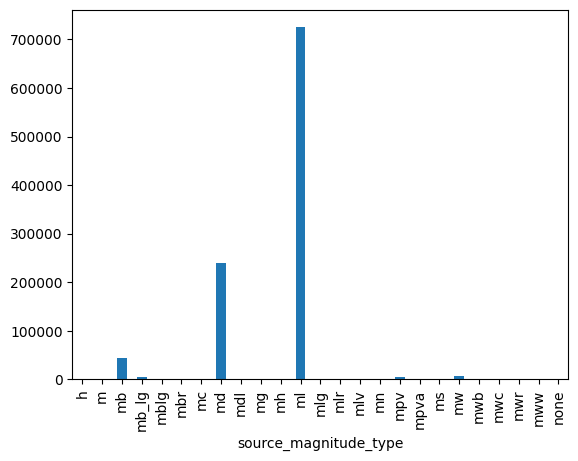

In [16]:
df_earthquakes.groupby('source_magnitude_type').size().plot(kind='bar')

<Axes: xlabel='source_magnitude'>

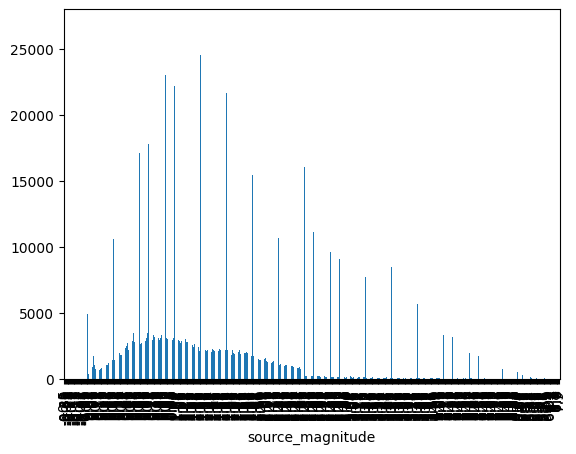

In [17]:
df_earthquakes.groupby('source_magnitude').size().plot(kind='bar')

**MODELO DE REGRESIÓN MÚLTIPLE**

Se aplicará un algoritmo de regresión múltiple con la magnitud del terremoto como variable objetivo puesto que resulta apropiado por distintas razones:
* Se desean evaluar relaciones complejas entre variables relevantes.  En el contexto de los datos sísmicos, esto es relevante, ya que la magnitud del terremoto está influenciada por factores geográficos y geofísicos.
* Se desea predecir la magnitud de futuros terremotos y comprender y analizar la relación causal que tienen las variables.  Por ejemplo, observar si a más profundidad, más daño superficial (caída de edificios, naturaleza, bienes materiales).
* La investigación sísmica se basa sobre todo en hallar posibles correlaciones entre distintos factores, por lo que la regresión puede explorar nuevas hipótesis.
* La regresión múltiple es un modelo básico pero a su vez potente, pues puede ser modificado para incluir efectos no lneales e interacciones entre variables.  Es capaz de adaptarse a la heterocedasticidad (varianza cambiante) o autocorrelación en los datos,

Primero se pasará la variable 'source_magnitude_type', que podría ser importante, a formato one-hot, pues toma valores como 'ml', 'mb', etc.  

In [18]:
import pandas as pd

dummies = pd.get_dummies(df_earthquakes['source_magnitude_type'], prefix='mag_type')

df_earthquakes= pd.concat([df_earthquakes, dummies], axis=1)
df_earthquakes.drop('source_magnitude_type', axis=1, inplace=True)

print(df_earthquakes.head())

                          network_code receiver_code receiver_type  \
trace_name                                                           
109C.TA_20060723155859_EV           TA          109C            BH   
109C.TA_20061103155652_EV           TA          109C            BH   
109C.TA_20061103161223_EV           TA          109C            BH   
109C.TA_20061114133221_EV           TA          109C            BH   
109C.TA_20061127104640_EV           TA          109C            BH   

                           receiver_latitude  receiver_longitude  \
trace_name                                                         
109C.TA_20060723155859_EV            32.8889           -117.1051   
109C.TA_20061103155652_EV            32.8889           -117.1051   
109C.TA_20061103161223_EV            32.8889           -117.1051   
109C.TA_20061114133221_EV            32.8889           -117.1051   
109C.TA_20061127104640_EV            32.8889           -117.1051   

                           recei

Tras investigar sobre los tipos de magnitudes y las distintas escalas en las que se clasifican, se van a tomar en cuenta solamente las más comunes, que son: mb, ml y ms.  Las demás se eliminarán.

In [19]:
df_earthquakes = df_earthquakes.drop(['mag_type_h', 'mag_type_m','mag_type_mb_lg','mag_type_mblg','mag_type_mbr', 'mag_type_mdl','mag_type_mg','mag_type_mh','mag_type_mc','mag_type_md','mag_type_mlg','mag_type_mlr',
                                     'mag_type_mlv','mag_type_mn','mag_type_mpv','mag_type_mpva','mag_type_mw','mag_type_mwb','mag_type_mwc','mag_type_mwr',
                                     'mag_type_mww'], axis=1)

A continuación se graficará la matriz de correlación teniendo en cuenta las variables del dataset que aparentemente pueden influir más en la magnitud del movimiento sísmico.

In [20]:
import pandas as pd
selected_columns = df_earthquakes[['source_magnitude','source_latitude', 'source_longitude','mag_type_mb','mag_type_ml','mag_type_ms','p_weight','p_travel_sec','receiver_elevation_m','back_azimuth_deg','source_depth_km','p_arrival_sample','receiver_latitude','receiver_longitude']] 
correlation_matrix = selected_columns.corr()

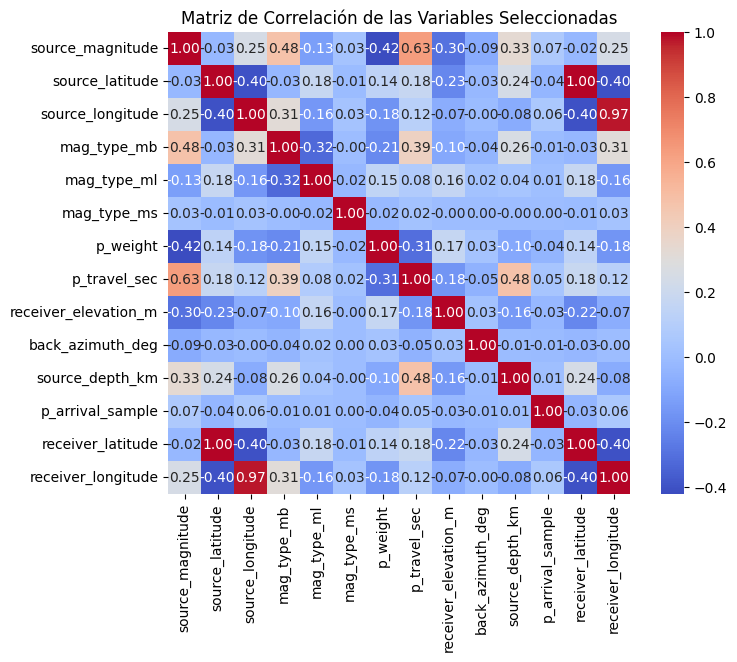

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Matriz de Correlación de las Variables Seleccionadas')

plt.show()

Para la regresión, es preciso escoger las variables predictoras que más relación guarden con la variable objetivo.  A su vez, dichas variables no deben presentar multicolinealidad entre ellas.  Para predecir la magnitud, se han elegido las siguientes variables independientes tras estudiar la correlación entre variables:
*
mag_type_mb,mag_type_none,p_travel_sec,p_weight,receiver_elevation_m,receiver_latitude,source_longitude,source_depth_km.*

Después de probar varios modelos de regresión, el realizado con estas variables ha sido el más sencillo que maximiza el R^2.  La elección de dichas variables ha sido, por una parte, intuitiva: la profundidad del terremoto afecta a los daños causados en la superficie (lo cual está muy relacionado con la magnitud); también se sabe que, por condiciones geofísicas y de geolocalización, ciertas ubicaciones son más propensas a los terremotos que otras, como Chile o Japón; y el tipo de magnitud se ve intuitivamente que está altamente relacionado con la magnitud total.

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_earthquakes[['mag_type_mb','p_travel_sec','p_weight','receiver_elevation_m','receiver_latitude',
                    'source_longitude','source_depth_km','mag_type_none']] 

y = df_earthquakes['source_magnitude']  # var objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2: {r2}')

MSE: 0.4347628658601463
R^2: 0.5432899967679191


El mejor modelo y el más simple obtenido ha sido este con un R^2 cercano a 0.55.  Para ser un buen modelo, debería al menos tener un 0.7, pero no se ha podido hacer una regresión mejor.  Podría mejorarse centrándose aún más en la ingeniería de características y teniendo en cuenta más variables.

Con respecto al MSE, el modelo difiere de los valores reales en un 0.43. 

**CLUSTERING**

Vamos a agrupar los datos según la profundidad y la magnitud para poder categorizar según los potenciales daños que pueden provocar:

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

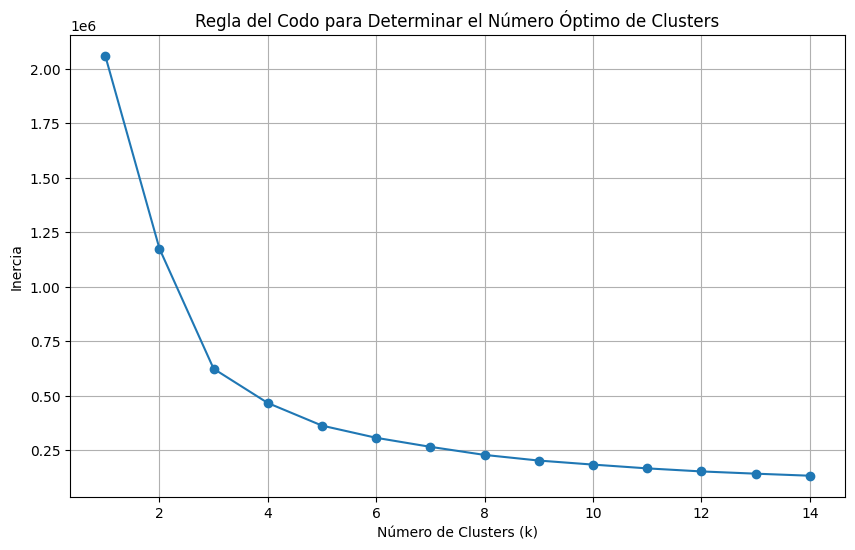

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv(os.path.join(input_dir, filename), low_memory=False)

# Crear un DataFrame de terremotos y seleccionar las características relevantes
df = df.set_index('trace_name')
df['trace_start_time'] = pd.to_datetime(df['trace_start_time'], format='ISO8601')
df['source_origin_time'] = pd.to_datetime(df['source_origin_time'], format='ISO8601')
df_earthquakes = df.loc[df.loc[:, 'trace_category'] == 'earthquake_local']

# Seleccionar las características relevantes
features = ['source_magnitude', 'source_depth_km']
df_cluster = df_earthquakes[features].dropna()

# Normalizar los datos
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# Aplicar K-means para diferentes valores de k
k_range = range(1, 15)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_cluster_scaled)
    inertia.append(kmeans.inertia_)

# Graficar la regla del codo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Regla del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

Parece ser que emplear 4 clusters es una buena decisión.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


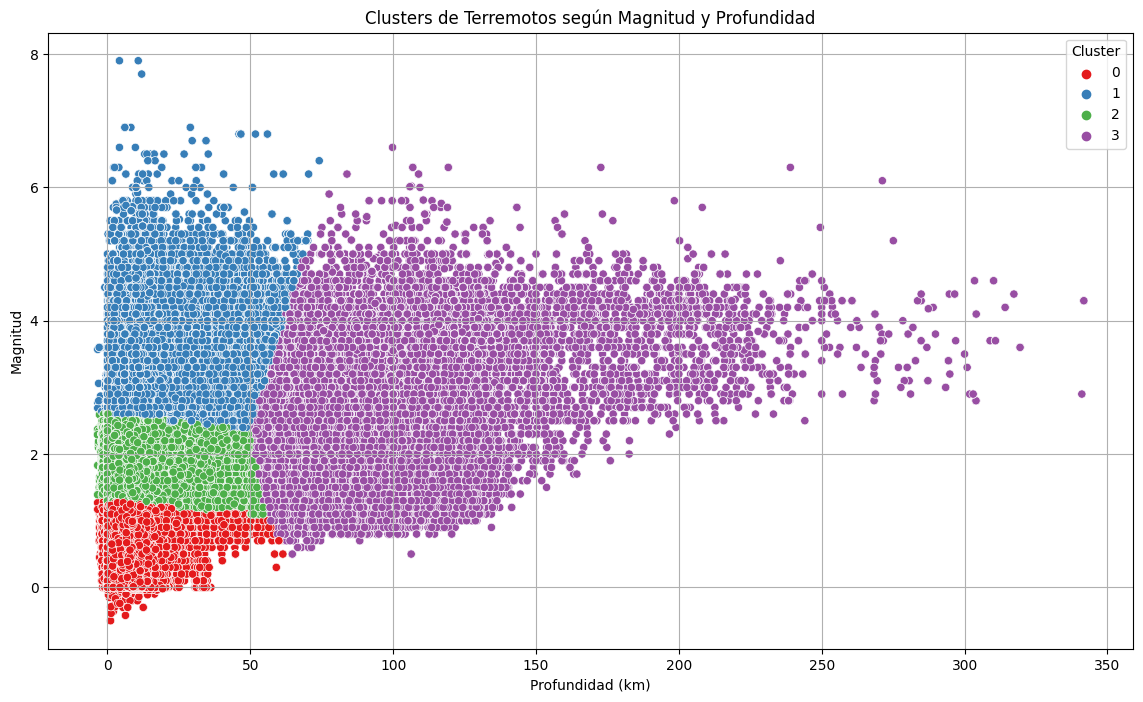

In [24]:
# Asumir el número óptimo de clusters como 4
k_optimal = 4
kmeans_optimal = KMeans(n_clusters=k_optimal, random_state=0)
df_cluster['cluster'] = kmeans_optimal.fit_predict(df_cluster_scaled)

# Visualizar los clusters según magnitud y profundidad
plt.figure(figsize=(14, 8))
sns.scatterplot(x='source_depth_km', y='source_magnitude', hue='cluster', palette='Set1', data=df_cluster)
plt.title('Clusters de Terremotos según Magnitud y Profundidad')
plt.xlabel('Profundidad (km)')
plt.ylabel('Magnitud')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

**Cluster rojo (0)**: Agrupa terremotos con profundidades bajas (0-50 km aproximadamente) y magnitudes que varían entre 0 y 3 aproximadamente. Este cluster representa terremotos que son relativamente superficiales y de baja magnitud. Este grupo de eventos sísmicos probablemente está asociado con fallas geológicas menores cerca de la superficie terrestre, donde los ajustes en la corteza son relativamente moderados y de bajo impacto. Los terremotos en este cluster, dada su baja magnitud, tienden a ser poco perceptibles o solamente levemente sentidos por las personas, representando un riesgo menor en términos de daños materiales o personales.

**Cluster azul (1)**: Contiene terremotos con profundidades que también varían de 0 a 50 km aproximadamente, pero con magnitudes mayores que los clusteres 0 y 2, situándose entre 3 y 6. Este cluster destaca por albergar terremotos superficiales de magnitud moderada a alta. Al igual que el cluster rojo, los terremotos son superficiales pero con una magnitud algo mayor. Este grupo refleja eventos sísmicos más intensos, que pueden ser fuertemente sentidos y con potencial para causar daños más significativos. La ocurrencia de terremotos en este rango sugiere una actividad geológica más dinámica y potencialmente peligrosa.

**Cluster verde (2)**: Este cluster incluye terremotos con profundidades similares al cluster rojo pero con magnitudes ligeramente mayores, oscilando entre 2 y 4 aproximadamente. Estos terremotos podrían ser claramente perceptibles y ocasionalmente causar daños leves en estructuras, lo que implica una atención particular en términos de planificación urbana y medidas de prevención sísmica.

**Cluster morado (3)**: Este es el cluster más disperso y abarca terremotos de profundidades que varían desde 0 hasta más de 300 km, con magnitudes que oscilan principalmente entre 4 y 6, aunque algunos alcanzan valores cercanos a 8. Este cluster es notable por incluir terremotos tanto superficiales como profundos y de magnitudes generalmente altas. Este amplio rango de profundidades y magnitudes indica una complejidad geológica considerable, donde diferentes tipos de actividad sísmica coexisten. Los terremotos profundos y de alta magnitud en este cluster suelen estar asociados con procesos tectónicos significativos. La liberación de esta energía puede resultar en terremotos devastadores, resaltando la importancia de una evaluación detallada del riesgo sísmico y la implementación de estrategias de mitigación adecuadas en estas áreas.

# Modelo SVM(SVC)

A continuación vamos a desarrollar un modelo para clasificar las señales sísmicas de forma binaria en “earthquake_local” (terremoto local) y “noise” (ruido). Para ello emplearemos SVC (Support Vector Classification), qué es un método muy eficaz para problemas de clasificación binaria.
A pesar de que hay una gran cantidad de algoritmos de clasificación binaria, los SVM(Support Vector Machine) presentan una gran robustez frente a la alta dimensionalidad, es decir, en problemas donde hay un gran número de características (que es nuestro caso pues tenemos 35 atributos). También tiene varias características que pueden llegar a resultar de utilidad como la capacidad de explorar en kernels no lineales, si las relaciones entre características y etiquetas lo fueran.
No obstante, hay situaciones en las que no funcione tan bien; por  ejemplo, si se produce un desbalance significativo entre las clases a predecir (tendrá problemas al clasificar la clase minoritaria) o problemas de escalabilidad con conjunto de datos muy grandes si no se ha realizado un preprocesamiento adecuado.

Comenzamos importando las librerías necesarias:


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import h5py
import os

Accuracy: 0.82


A continuación especificamos los tipos de datos de todos los atributos, para evitar cualquier error relacionado al cargar el conjunto de datos

In [ ]:
# Especificar los tipos de datos para evitar advertencias
dtypes = {
    'network_code': 'str',
    'receiver_code': 'str',
    'receiver_type': 'str',
    'receiver_latitude': 'float64',
    'receiver_longitude': 'float64',
    'receiver_elevation_m': 'float64',
    'p_arrival_sample': 'float64',
    'p_status': 'str',
    'p_weight': 'float64',
    'p_travel_sec': 'float64',
    's_arrival_sample': 'float64',
    's_status': 'str',
    's_weight': 'float64',
    'source_id': 'str',
    'source_origin_time': 'str',
    'source_origin_uncertainty_sec': 'float64',
    'source_latitude': 'float64',
    'source_longitude': 'float64',
    'source_error_sec': 'float64',
    'source_gap_deg': 'float64',
    'source_horizontal_uncertainty_km': 'float64',
    'source_depth_km': 'float64',
    'source_depth_uncertainty_km': 'float64',
    'source_magnitude': 'float64',
    'source_magnitude_type': 'str',
    'source_magnitude_author': 'str',
    'source_mechanism_strike_dip_rake': 'str',
    'source_distance_deg': 'float64',
    'source_distance_km': 'float64',
    'back_azimuth_deg': 'float64',
    'snr_db': 'str',
    'coda_end_sample': 'str',
    'trace_start_time': 'str',
    'trace_category': 'str',
    'trace_name': 'str'
}

Cargamos los metadatos de nuestra base de datos desde el archivo CSV. Para ello se define la ruta del directorio de entrada y el nombre del archivo CSV, luego se carga en un “DataFrame” de pandas.

In [ ]:
# Cargar los datos con tipos de datos especificados
input_dir = '/kaggle/input/stanford-earthquake-dataset-stead/'
metadata_path = 'merge.csv'
df = pd.read_csv(os.path.join(input_dir, metadata_path), dtype=dtypes, low_memory=False)

Ahora seleccionamos las características (que serían los predictores) y la etiqueta (que sería la variable objetivo) que se utilizarán para el modelo:

In [ ]:
# Seleccionar características y etiquetas
features = df[['receiver_latitude', 'receiver_longitude', 'receiver_elevation_m']]
labels = df['trace_category'].apply(lambda x: 1 if x == 'earthquake_local' else 0)


Como hemos mencionado anteriormente el preprocesamiento es un paso crucial, por lo que vamos a escalar las características para normalizar los datos.
En este caso, El "StandardScaler" estandariza las características eliminando la media y escalando a la varianza unitaria.

In [ ]:
# Escalar las características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

A  continuación hacemos una división estándar en conjuntos de entrenamiento y prueba, con:


*X_train y y_train:* Datos de entrenamiento.

*X_test y y_test:* Datos de prueba.

*test_size=0.2* indica que el 20% de los datos se utilizarán para pruebas.

*random_state=42*

In [ ]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

Para el entrenamiento del modelo, definimos una función empleando *SGDClassifier* en lotes:

*SGDClassifier*: Utiliza la pérdida 'hinge' que es equivalente a un SVM lineal.

*partial_fit*: Permite entrenar el modelo en lotes, adecuado para grandes volúmenes de datos.

*batch_size*: Define el tamaño del lote para cada iteración de entrenamiento.

In [ ]:
# Función para entrenar SVM en lotes utilizando SGDClassifier
def train_svm_in_batches(X_train, y_train, batch_size=10000):
    svm = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3)
    num_samples = X_train.shape[0]
    for i in range(0, num_samples, batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        svm.partial_fit(X_batch, y_batch, classes=np.unique(y_train))
    return svm

Entrenamos el modelo con la función definida anteriormente:

In [ ]:
# Entrenar SVM en lotes
svm_model = train_svm_in_batches(X_train, y_train, batch_size=10000)

Ahora definimos otra función que se encargará de predecir los resultados en el conjunto de prueba en lotes:

*predict*: Realiza predicciones para cada lote de datos.

*y_pred*: Lista que almacena las predicciones de todos los lotes.

In [ ]:
# Predecir en el conjunto de prueba por lotes
def predict_in_batches(model, X_test, batch_size=10000):
    num_samples = X_test.shape[0]
    y_pred = []
    for i in range(0, num_samples, batch_size):
        X_batch = X_test[i:i+batch_size]
        y_pred_batch = model.predict(X_batch)
        y_pred.extend(y_pred_batch)
    return np.array(y_pred)



Finalmente, se predicen los resultados del conjunto de prueba y se evalúa la precisión del modelo

In [ ]:
y_pred = predict_in_batches(svm_model, X_test, batch_size=10000)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Como se puede apreciar, la precisión del modelo es 0.82; lo que quiere decir que predecirá correctacmente si se trata de un terremoto o ruido sísmico el 82% de las ocasiones.

Estamos bastante satisfechos, pues consideramos que una precisión superior al 80% aporta bastante credibilidad al modelo. Además, aunque se trata de una clasificación binaria en la que se suele esperar un porcentaje de aciertos elevados, dada la complejidad de los datos  

A continuación, vamos a repetir el modelo empleando los datos ".hdf5" que contienen formas de onda sísmica. Puesto que se trata de datos mucho más pesados y complejos, el modelo tendrá ciertas diferencias notables en el tratamiento de los datos.    

**(WARNING: Dado el gran peso de los datos, la ejecuación de esta celda ronda los 15-20 minutos. Si no se desea comprobar el resultado, ignorar)**

# A priori magnitudes

Se pasa a ritcher

<Axes: xlabel='source_magnitude_type'>

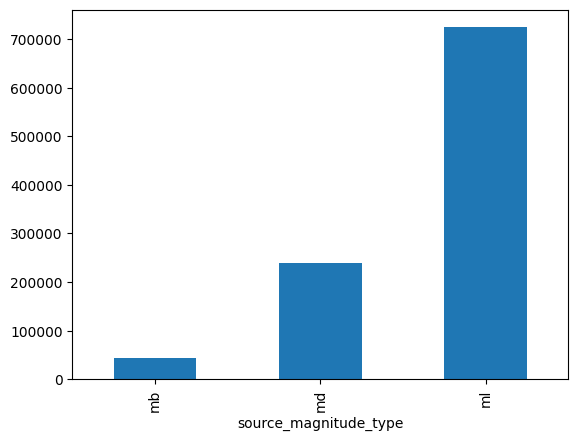

In [ ]:
used_scales = ['mb', 'md', 'ml']
df_earthquakes = df_earthquakes[df_earthquakes['source_magnitude_type'].isin(used_scales)]
df_earthquakes.groupby('source_magnitude_type').size().plot(kind='bar')

In [ ]:
df_earthquakes_gsp = df_earthquakes[df_earthquakes['source_magnitude_type'].isin(['ml'])]
df_earthquakes_gsp.shape

(724632, 34)

In [ ]:
used_vars = ['source_id', 'source_origin_time', 'source_magnitude','source_latitude', 'source_longitude']
df_earthquakes_gsp = df_earthquakes_gsp[used_vars]
df_earthquakes_gsp = df_earthquakes_gsp.sort_values(by=['source_id', 'source_origin_time'])
df_earthquakes_gsp.head()

,source_id,source_origin_time,source_magnitude,source_latitude,source_longitude
trace_name,,,,,
BUG.GR_19970103035611_EV,1004691,1997-01-03 03:56:12.900,1.1,51.5342,6.8750
BNI.MN_19970103224216_EV,1004820,1997-01-03 22:42:20.580,2.3,45.2484,6.5050
CLL.GR_19970108225337_EV,1005509,1997-01-08 22:53:33.900,0.9,50.6900,12.4000
TPH.LB_19970120071157_EV,1007334,1997-01-20 07:12:00.530,3.0,38.2618,-116.9584
TPH.LB_19970120071158_EV,1007334,1997-01-20 07:12:00.530,3.0,38.2618,-116.9584


In [ ]:
import pandas as pd

bins = [-float('inf'), 1.9, 2.9, 3.9, 4.9, 5.9, 6.9, 7.9, 8.9, float('inf')]
labels = [
    'micro',
    'minor',
    'slight',
    'light',
    'moderate',
    'strong',
    'mayor',
    'great',
    'extreme'
    ]

df_earthquakes_gsp.loc[:, 'ritcher'] = pd.cut(df_earthquakes_gsp['source_magnitude'], bins=bins, labels=labels, right=False)
print(df_earthquakes.shape)
df_earthquakes_gsp.head()

(1006974, 34)


,source_id,source_origin_time,source_magnitude,source_latitude,source_longitude,ritcher
trace_name,,,,,,
BUG.GR_19970103035611_EV,1004691,1997-01-03 03:56:12.900,1.1,51.5342,6.8750,micro
BNI.MN_19970103224216_EV,1004820,1997-01-03 22:42:20.580,2.3,45.2484,6.5050,minor
CLL.GR_19970108225337_EV,1005509,1997-01-08 22:53:33.900,0.9,50.6900,12.4000,micro
TPH.LB_19970120071157_EV,1007334,1997-01-20 07:12:00.530,3.0,38.2618,-116.9584,slight
TPH.LB_19970120071158_EV,1007334,1997-01-20 07:12:00.530,3.0,38.2618,-116.9584,slight


In [ ]:
df_earthquakes_gsp = df_earthquakes_gsp.groupby('source_id').first()
print(df_earthquakes_gsp.shape)
df_earthquakes_gsp.head()

(259789, 5)


,source_origin_time,source_magnitude,source_latitude,source_longitude,ritcher
source_id,,,,,
1004691,1997-01-03 03:56:12.900,1.1,51.5342,6.8750,micro
1004820,1997-01-03 22:42:20.580,2.3,45.2484,6.5050,minor
1005509,1997-01-08 22:53:33.900,0.9,50.6900,12.4000,micro
1007334,1997-01-20 07:12:00.530,3.0,38.2618,-116.9584,slight
1007612,1997-01-21 21:38:29.900,1.3,50.2200,8.2000,micro


In [ ]:
NE = (df_earthquakes_gsp['source_latitude'] > 0) & (df_earthquakes_gsp['source_longitude'] > 0)
df_earthquakes_gsp_XY = df_earthquakes_gsp.loc[NE]
print(df_earthquakes_gsp_XY.shape)
df_earthquakes_gsp_XY.head()

(8827, 5)


,source_origin_time,source_magnitude,source_latitude,source_longitude,ritcher
source_id,,,,,
1004691,1997-01-03 03:56:12.900,1.1,51.5342,6.875,micro
1004820,1997-01-03 22:42:20.580,2.3,45.2484,6.505,minor
1005509,1997-01-08 22:53:33.900,0.9,50.6900,12.400,micro
1007612,1997-01-21 21:38:29.900,1.3,50.2200,8.200,micro
1009133,1997-02-01 11:17:43.900,1.8,51.6800,7.570,micro


In [ ]:
secuencias_por_mes = df_earthquakes_gsp_XY.groupby(pd.Grouper(key='source_origin_time', freq='ME'))['ritcher'].apply(list)
print(secuencias_por_mes)

source_origin_time
1992-03-31                        [slight]
1992-04-30                              []
1992-05-31                              []
1992-06-30                              []
1992-07-31                              []
                          ...             
2018-08-31                        [slight]
2018-09-30    [minor, minor, minor, minor]
2018-10-31    [minor, minor, minor, minor]
2018-11-30                         [light]
2018-12-31                        [slight]
Freq: ME, Name: ritcher, Length: 322, dtype: object


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

secuencias = secuencias_por_mes.to_list()
te = TransactionEncoder()
te_ary = te.fit(secuencias).transform(secuencias)
res = pd.DataFrame(te_ary, columns=te.columns_)
res

,light,micro,minor,slight
0,False,False,False,True
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
317,False,False,False,True
318,False,False,True,False
319,False,False,True,False
320,True,False,False,False
